# Predicting Car Prices

In this project, we'll practice the machine learning workflow using the k-nearest neighbors algorithm to predict a car's market price using its attributes. Let's make the column names as in the original set and explore dete set.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel_base',
        'length', 'width', 'height', 'curb_weight', 'engine-type', 'num-of-cylinders',
        'engine_size', 'fuel-system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
        'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel_base,...,engine_size,fuel-system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data cleaning and preparation

Let's examine our date set in more detail, keep only all the numeric columns, find out if there are missing values.


In [2]:
columns = ['normalized-losses', 'wheel_base', 'length', 'width', 'height',
           'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
           'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = cars[columns]
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-null object
peak_rpm             205 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


As we can see, the missing values in column 'normalized-losses' are denoted by "?". Let's replace them with NaN

In [3]:
cars = cars.replace('?', np.nan)
cars = cars.astype('float')
cars.head()

,normalized-losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Looks better! Now we need to find out how many lost values we have in the entire table.

In [4]:
cars.isnull().sum()

normalized-losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

As we can see, there are 41 lost values in the "normalized-losses" column, which is about 20%. Let's fill this column with the average values of the "normalized-losses" column.

In [5]:
cars['normalized-losses'] = cars['normalized-losses'].fillna(cars['normalized-losses']
                                                  .mean())                                                

In [6]:
cars.isnull().sum()

normalized-losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [7]:
# We delete the rest of the rows with the lost values, 
# because they are few.
cars = cars.dropna(axis=0)
cars

,normalized-losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,122.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,122.0,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.0


Now we need to normalize all the numeric columns (except 'price')
 so all values range from 0 to 1.

In [8]:
price_col = cars['price']
normal_cars = (cars - cars.min())/(cars.max() - cars.min())
normal_cars['price'] = price_col
normal_cars

,normalized-losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


Now let's get down to the analysis!

## Univariate Model

In [9]:

def knn_train_test(train_col, target_col, df, k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide the set into training (75%) and testing (25%).
    index = int(0.75*len(rand_df))
    train_df = rand_df[:index].copy()
    test_df = rand_df[index:].copy()
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    # Make predictions using model.
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(predictions, test_df[target_col])
    return mse**0.5

# For each column (minus `price`), train a model, return RMSE value
# and add to the list `rmse_results`.
columns = [ 'normalized-losses', 'wheel_base', 'length', 'width', 'height',
            'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
            'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
rmse_results = []
for col in columns:
    rmse_results.append([col, ':', knn_train_test(col, 'price', normal_cars)])

rmse_results.sort(key = lambda x: x[2])

for el in rmse_results:
    print(el)

['city_mpg', ':', 3552.957671735319]
['engine_size', ':', 3600.106719846748]
['length', ':', 3626.4605069079776]
['wheel_base', ':', 3899.7840389185753]
['width', ':', 4223.196157279122]
['horsepower', ':', 4418.784715096148]
['highway_mpg', ':', 4542.0785980672335]
['curb_weight', ':', 4620.6786811339425]
['bore', ':', 5517.116729611878]
['normalized-losses', ':', 6011.397393387372]
['compression_ratio', ':', 6139.234683274987]
['height', ':', 6281.293613872343]
['stroke', ':', 6430.800062391069]
['peak_rpm', ':', 6864.166167830718]


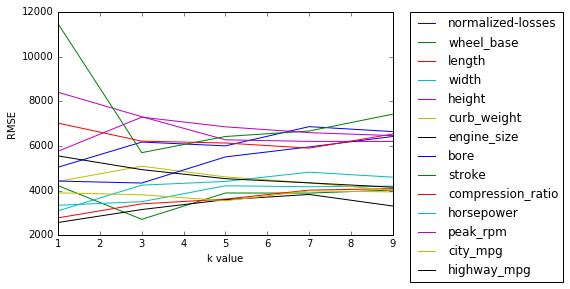

In [10]:
# See the result for different k for each column.
k_values = [1, 3, 5, 7, 9]

# Create a list for rmse results
rmse_results = []
# Look for the result for each column and each k_value
for col in columns:
    mses = []
    for k in k_values:
        mse = knn_train_test(col, 'price', normal_cars, k=k)
        mses.append(mse)
    rmse_results.append([k_values, mses])
    
# Visualize the rmse_results
for i, el in enumerate(rmse_results):
    plt.plot(el[0], el[1], label=columns[i])
    plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate Model

In [13]:
# Modify the knn_train_test function  to work with multiple columns
def knn_train_test(train_cols, target_col, df, k=5):
    
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide the set into training (75%) and testing (25%).
    index = int(0.75*len(rand_df))
    train_df = rand_df[:index].copy()
    test_df = rand_df[index:].copy()

    # Fit a KNN model using default k value.
    knn.fit(train_df[train_cols], train_df[target_col])
    
     # Make predictions using model.
    predictions = knn.predict(test_df[train_cols])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(predictions, test_df[target_col])
    return mse**0.5

# Use the best 2, 3, 4, 5 and 6 features to train and test
# a multivariate model using the default k value.
features = []
features.append([2, ':', knn_train_test(['city_mpg',  'engine_size'],
                                   'price', normal_cars)])
features.append([3, ':', knn_train_test(['city_mpg',  'engine_size',  'length'],
                                   'price', normal_cars)])
features.append([4, ':', knn_train_test(['city_mpg',  'engine_size',  'length',  'wheel_base'],
                                   'price', normal_cars)])
features.append([5, ':', knn_train_test(['city_mpg',  'engine_size',  'length',  'wheel_base', 'width'],
                                   'price', normal_cars)])
features.append([6, ':', knn_train_test(['city_mpg',  'engine_size',  'length',  'wheel_base', 'width', 'horsepower'],
                                   'price', normal_cars)])

for el in features:
    print(el)


[2, ':', 3502.8709043076224]
[3, ':', 3125.430969270233]
[4, ':', 3301.560096656842]
[5, ':', 2856.670763711649]
[6, ':', 2928.817929974271]


## Hyperparameter Tuning

Change the k value in the range (1, 21) for 3 features from the previous step with better results.

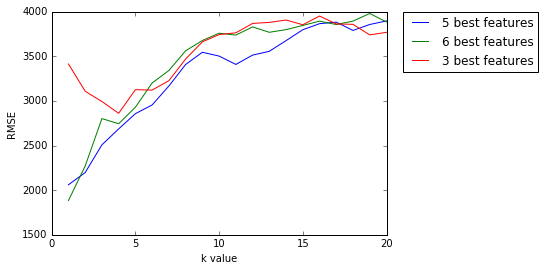

In [12]:
best_3 = [['city_mpg',  'engine_size',  'length',  'wheel_base', 'width'],
          ['city_mpg',  'engine_size',  'length',  'wheel_base', 'width', 'horsepower'],
          ['city_mpg',  'engine_size',  'length']]

k_values = [el for el in range(1,21)]

values = []
for cols in best_3:
    mses = []
    for k in k_values:
        mse = knn_train_test(cols, 'price', normal_cars, k=k)
        mses.append(mse)
    values.append([k_values, mses])

labels = ['5 best features', '6 best features', '3 best features']
for i, el in enumerate(values):
    plt.plot(el[0], el[1], label=labels[i])
    plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.xlabel('k value')
    plt.ylabel('RMSE')